In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
import math

__Example 20.0.1__ Consider the following scenario. Suppose that a product has five types of defects A, B,
C, D, and E, where A is life-threatening, B is not life- threatening but quite serious, C is serious, D is
somewhat serious, and E is not serious or merely a nuisance. Suppose that we assign weights of 10 to A,
7.5 to B, 5 to C, 2 to D, and 0.5 to E. The data collected over a period of study are as shown in Table
20.1. Construct a Pareto chart.

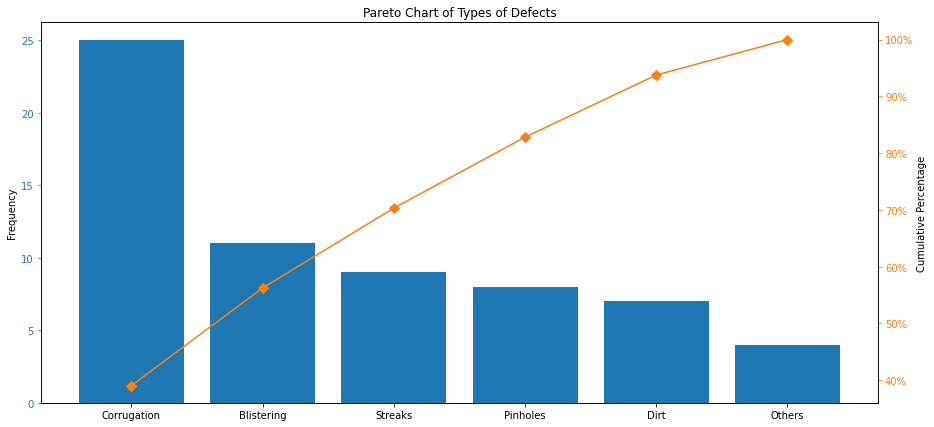

In [2]:
defects = [25, 9, 8, 7, 11, 4]
defects_names = ["Corrugation", "Streaks", "Pinholes", "Dirt", "Blistering", "Others"]

# make a dataframe
df = pd.DataFrame({'defects': defects})
df.index = defects_names
df = df.sort_values(by='defects',ascending=False)
df["cumpercentage"] = df["defects"].cumsum() / df["defects"].sum() * 100

# plotting
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df.index, df["defects"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.title("Pareto Chart of Types of Defects")
ax.set_ylabel("Frequency")
ax2.set_ylabel("Cumulative Percentage")
plt.show()

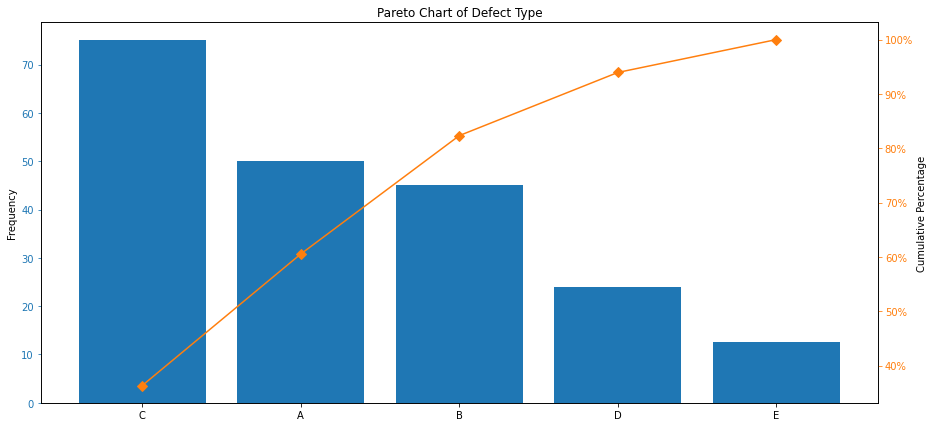

In [3]:
# Use of weighted frequencies
frequencies = np.array([5,6,15,12,25])
weights = np.array([10,7.5,5,2,0.5])
weighted_defect = frequencies * weights

weighted_defect_names = ["A", "B", "C", "D", "E"]

# make a dataframe
df = pd.DataFrame({'weighted_defect': weighted_defect})
df.index = weighted_defect_names
df = df.sort_values(by='weighted_defect',ascending=False)
df["cumpercentage"] = df["weighted_defect"].cumsum() / df["weighted_defect"].sum() * 100

# plotting
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df.index, df["weighted_defect"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.title("Pareto Chart of Defect Type")
ax.set_ylabel("Frequency")
ax2.set_ylabel("Cumulative Percentage")
plt.show()

__Example 20.5.2__ (Ball-bearing data) Table 20.5.1 (see Textbook) provides data on the diameter measurements of ball-bearings used in the wheels of heavy construction equipment. Twenty-five samples, each of size four, are taken directly from the production line. Samples come from all three shifts, and no one sample contains data from two or more shifts. Use these data to construct $\bar{X}$ and Python charts and to verify that the process is stable. Assume that the diameter measurements are normally distributed.

In [4]:
data = pd.read_excel('table511.xlsx')
data.head()

,Sample Number,Obs. 1,Obs. 2,Obs. 3,Obs. 4,X bar,R
0,1,15.155,15.195,15.145,15.125,15.155,0.070
1,2,15.095,15.162,15.168,15.163,15.147,0.073
2,3,15.115,15.126,15.176,15.183,15.150,0.068
3,4,15.122,15.135,15.148,15.155,15.140,0.033
4,5,15.148,15.152,15.192,15.148,15.160,0.044


In [5]:
stdevs = []
for d in data.values:
    stdevs.append(np.std(d[1:5], ddof=1))  # adding a standard deviation column

data['std'] = stdevs
data.head()

,Sample Number,Obs. 1,Obs. 2,Obs. 3,Obs. 4,X bar,R,std
0,1,15.155,15.195,15.145,15.125,15.155,0.070,0.029439
1,2,15.095,15.162,15.168,15.163,15.147,0.073,0.034766
2,3,15.115,15.126,15.176,15.183,15.150,0.068,0.034477
3,4,15.122,15.135,15.148,15.155,15.140,0.033,0.014583
4,5,15.148,15.152,15.192,15.148,15.160,0.044,0.021417


Center: 15.16248
UCL: 15.1867688397575
LCL: 15.138191160242501


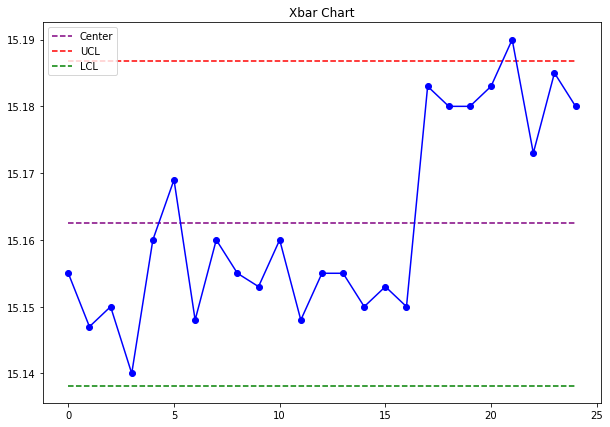

In [6]:
# sample size (number of observations) = 4
s = 4

plt.figure(figsize=(10, 7))
plt.plot(data['X bar'], linestyle='-', marker='o', color='blue')
center = np.mean(data['X bar'])
plt.hlines(y=center, xmin=0, xmax=24, color='purple', linestyles='dashed', label='Center')

# estimating sigma
sbar = np.mean(data['std'])
c4 = np.sqrt(2 / (s - 1)) * (math.gamma(s / 2) / math.gamma((s - 1) / 2))
sigma = sbar / c4

UCL = center + 3 * (sigma / np.sqrt(s))
plt.hlines(y=UCL, xmin=0, xmax=24, color='red', linestyles='dashed', label="UCL")

LCL = center - 3 * (sigma / np.sqrt(s))
plt.hlines(y=LCL, xmin=0, xmax=24, color='green', linestyles='dashed', label="LCL")

print("Center:", center)
print("UCL:", UCL)
print("LCL:", LCL)

plt.legend()
plt.title("Xbar Chart")
plt.show()

Center: 0.033319999999999995
UCL: 0.07807547751286698
LCL: 0


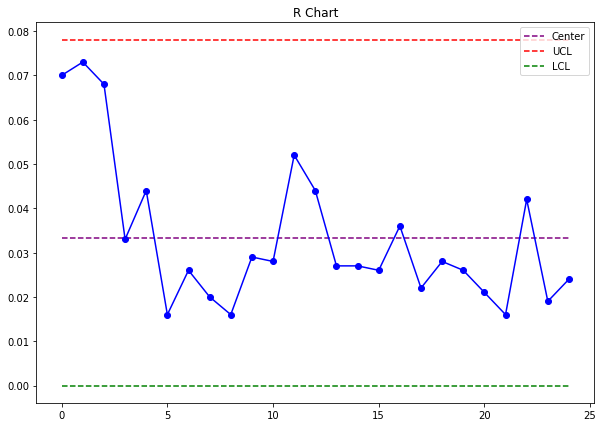

In [7]:
plt.figure(figsize=(10, 7))
plt.plot(data['R'], linestyle='-', marker='o', color='blue')
center = np.mean(data['R'])
plt.hlines(y=center, xmin=0, xmax=24, color='purple', linestyles='dashed', label='Center')

UCL = center + 3 * np.mean(data['std'])
plt.hlines(y=UCL, xmin=0, xmax=24, color='red', linestyles='dashed', label='UCL')

LCL = center - 3 * np.mean(data['std'])

# clean LCL (round to 0 if less than 0)
if LCL < 0:
    LCL = 0
plt.hlines(y=LCL, xmin=0, xmax=24, color='green', linestyles='dashed', label='LCL')

print("Center:", center)
print("UCL:", UCL)
print("LCL:", LCL)

plt.title("R Chart")
plt.legend()
plt.show()

__Example 20.5.3__ (Ball-bearing data) Use the ball-bearing data in Table 20.5.1 (see Textbook) to construct the X¯ and S control charts.

Center: 15.16248
UCL: 15.185835
LCL: 15.139125


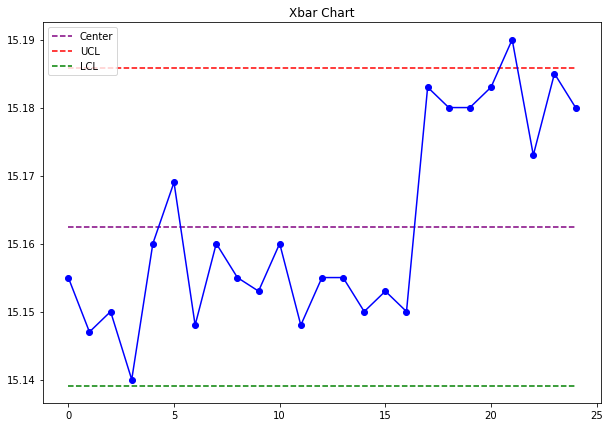

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(data['X bar'], linestyle='-', marker='o', color='blue')
center = np.mean(data['X bar'])
plt.hlines(y=center, xmin=0, xmax=24, color='purple', linestyles='dashed', label='Center')

sigma = 0.01557  # given

# sample size (number of observations) = 4
s = 4

UCL = center + 3 * (sigma / np.sqrt(s))
plt.hlines(y=UCL, xmin=0, xmax=24, color='red', linestyles='dashed', label="UCL")

LCL = center - 3 * (sigma / np.sqrt(s))
plt.hlines(y=LCL, xmin=0, xmax=24, color='green', linestyles='dashed', label="LCL")

print("Center:", center)
print("UCL:", UCL)
print("LCL:", LCL)

plt.legend()
plt.title("Xbar Chart")
plt.show()

Center: 0.014918492504288991
UCL: 0.03307983287743316
LCL: 0


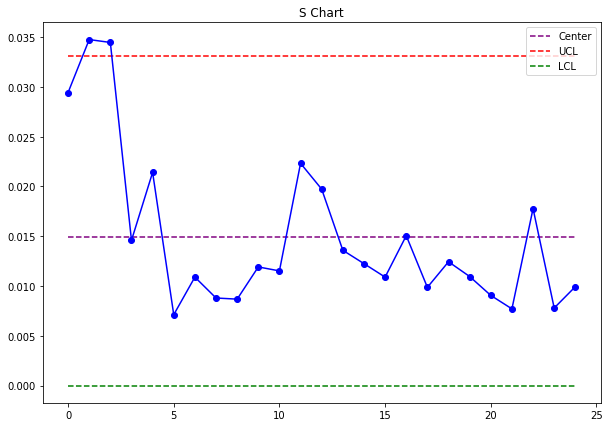

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(data['std'], linestyle='-', marker='o', color='blue')
center = np.mean(data['std'])
plt.hlines(y=center, xmin=0, xmax=24, color='purple', linestyles='dashed', label='Center')

# sample size (number of observations) = 4
s = 4

# determining c4
c4 = np.sqrt(2 / (s - 1)) * (math.gamma(s / 2) / math.gamma((s - 1) / 2))

# input sigma
sigma = 0.01557

UCL = center + 3 * sigma * np.sqrt(1 - c4**2)
plt.hlines(y=UCL, xmin=0, xmax=24, color='red', linestyles='dashed', label='UCL')

LCL = center - 3 * sigma * np.sqrt(1 - c4**2)

# clean LCL for negative numbers (round to 0)
if LCL < 0:
    LCL = 0
plt.hlines(y=LCL, xmin=0, xmax=24, color='green', linestyles='dashed', label='LCL')

print("Center:", center)
print("UCL:", UCL)
print("LCL:", LCL)

plt.title("S Chart")
plt.legend()
plt.show()

__Example 20.6.1__ (Nonconforming computer chips) A semiconductor industry tracks the number of nonconforming computer chips produced each day. A team of engineers wants to improve the overall quality by reducing the fraction of nonconforming computer chips. To achieve this goal, the team decided to set up a p chart based on inspections of 1000 chips daily for a period of 30 days. Table 20.2 gives the number of nonconforming chips out of 1000 inspected chips each day during the study period of 30 days.

In [10]:
data = pd.read_excel('table2062.xlsx')
data

,Non-conforming,"Fraction, Non-conforming"
0,9,0.009
1,5,0.005
2,6,0.006
3,11,0.011
4,11,0.011
5,12,0.012
6,7,0.007
7,11,0.011
8,6,0.006
9,6,0.006


Center: 0.008366666666666668
UCL: 0.017007846562953982
LCL: 0


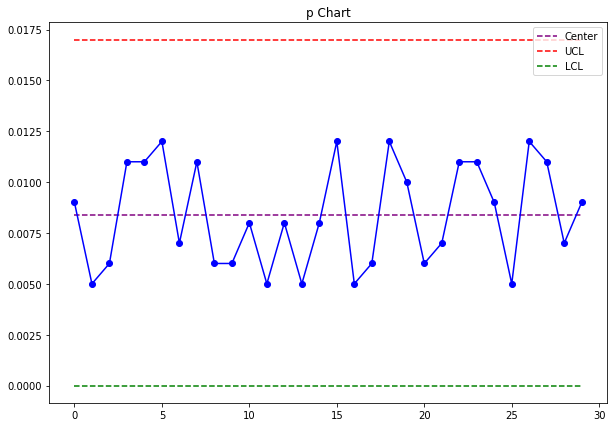

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(data['Fraction, Non-conforming'], linestyle='-', marker='o', color='blue')
center = np.mean(data['Fraction, Non-conforming'])
plt.hlines(y=center, xmin=0, xmax=29, color='purple', linestyles='dashed', label='Center')

UCL = center + 3 * np.sqrt(center * (1 - center) / 1000)
plt.hlines(y=UCL, xmin=0, xmax=29, color='red', linestyles='dashed', label="UCL")

LCL = center - 3 * np.sqrt(center * (1 - center) / 1000)

# cleaning LCL (round to 0 if less than 0)
if LCL < 0:
    LCL = 0
plt.hlines(y=LCL, xmin=0, xmax=29, color='green', linestyles='dashed', label="LCL")

print("Center:", center)
print("UCL:", UCL)
print("LCL:", LCL)

plt.legend()
plt.title("p Chart")
plt.show()

__Example 20.6.2__ (Nonconforming computer chips) Suppose that the number of computer chips manufactured varies during the fixed period on each day. The data collected for the study period of 30 days are as shown in Table 20.6.3 (see Textbook). Construct the p chart for these data and determine whether the process is stable.

In [14]:
data = pd.read_excel("table2063.xlsx")
data

,Day,Number Non-conforming,Sample Size
0,1,7,908
1,2,11,986
2,3,8,976
3,4,7,991
4,5,7,944
5,6,5,906
6,7,11,928
7,8,5,948
8,9,10,994
9,10,8,960


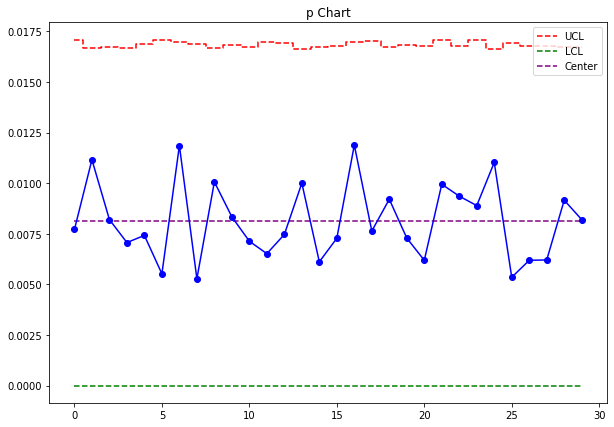

In [15]:
data['p'] = data['Number Non-conforming'] / data['Sample Size']

pbar = np.mean(data['p'])

UCL, LCL = [], []
for n in data['Sample Size']:
    LCL.append(pbar - 3 * np.sqrt(pbar * (1 - pbar) / n))
    UCL.append(pbar + 3 * np.sqrt(pbar * (1 - pbar) / n))

# clean LCL for negative numbers (round to 0)
for idx, l in enumerate(LCL):
    if l < 0:
        LCL[idx] = 0

plt.figure(figsize=(10, 7))
plt.plot(data['p'], linestyle='-', marker='o', color='blue')

plt.hlines(y=pbar, xmin=0, xmax=29, color='purple', linestyles='dashed', label='Center')

plt.plot(UCL, color='red', linestyle='--', label="UCL", drawstyle='steps-mid')

plt.plot(LCL, color='green', linestyle='--', label="LCL", drawstyle='steps-mid')

plt.legend(loc='upper right')
plt.title("p Chart")
plt.show()

In [16]:
data = pd.read_excel('table2062.xlsx')
data

,Non-conforming,"Fraction, Non-conforming"
0,9,0.009
1,5,0.005
2,6,0.006
3,11,0.011
4,11,0.011
5,12,0.012
6,7,0.007
7,11,0.011
8,6,0.006
9,6,0.006


Center: 8.366666666666669
UCL: 17.00784656295398
LCL: 0


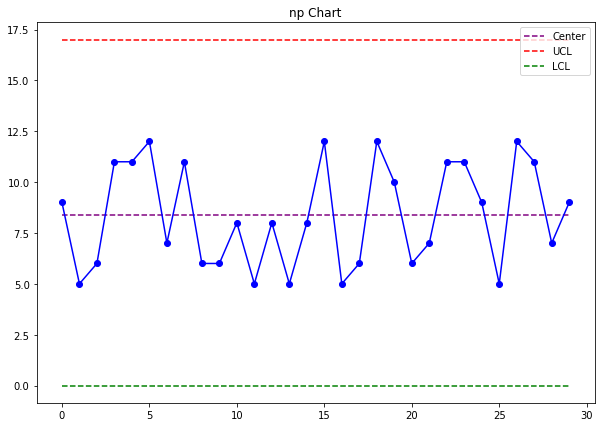

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(data['Non-conforming'], linestyle='-', marker='o', color='blue')
pbar = np.mean(data['Fraction, Non-conforming'])
center = 1000 * pbar
plt.hlines(y=center, xmin=0, xmax=29, color='purple', linestyles='dashed', label='Center')

UCL = center + 3 * np.sqrt(center * (1 - pbar))
plt.hlines(y=UCL, xmin=0, xmax=29, color='red', linestyles='dashed', label="UCL")

LCL = center - 3 * np.sqrt(center * (1 - pbar))
# cleaning up LCL
if LCL < 0:
    LCL = 0
plt.hlines(y=LCL, xmin=0, xmax=29, color='green', linestyles='dashed', label="LCL")

print("Center:", center)
print("UCL:", UCL)
print("LCL:", LCL)

plt.legend()
plt.title("np Chart")
plt.show()

__Example 20.6.4__ (Defects in paper rolls) A paper mill has detected that almost 90% of rejected paper rolls are due to nonconformities of two types, holes and wrinkles in the paper. An engineering team in the mill decided to set up control charts to reduce or eliminate the number of these nonconformities. To set up control charts, the team decided to collect some data by randomly taking five rolls each day for 30 days and counting the number of nonconformities (holes and wrinkles) on each day (the day being the unit of choice). The data are shown in Table 20.3. Set up a c control chart using these data, assuming
that the number of nonconformities in five rolls is Poisson with parameter λ.

In [18]:
data = pd.read_excel('table2064.xlsx', index_col='Day')
data

,Number Non-conformities
Day,
1,5
2,11
3,4
4,8
5,6
6,13
7,3
8,5
9,4


Center: 7.4
UCL: 15.560882305241266
LCL: 0


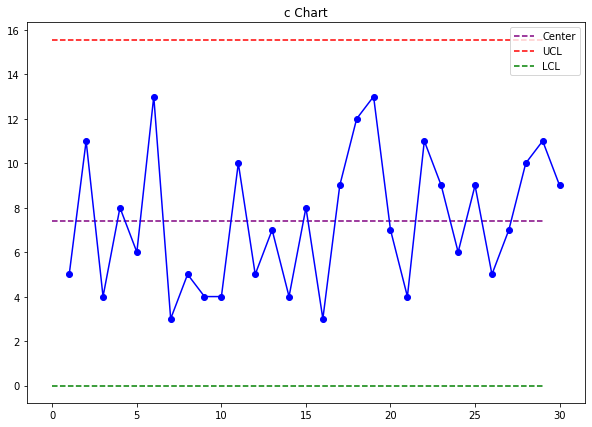

In [19]:
plt.figure(figsize=(10, 7))
plt.plot(data['Number Non-conformities'], linestyle='-', marker='o', color='blue')
center = np.mean(data['Number Non-conformities'])
plt.hlines(y=center, xmin=0, xmax=29, color='purple', linestyles='dashed', label='Center')

UCL = center + 3 * np.sqrt(center)
plt.hlines(y=UCL, xmin=0, xmax=29, color='red', linestyles='dashed', label="UCL")

LCL = center - 3 * np.sqrt(center)

# clean LCL (round to 0 if less)
if LCL < 0:
    LCL = 0

plt.hlines(y=LCL, xmin=0, xmax=29, color='green', linestyles='dashed', label="LCL")

print("Center:", center)
print("UCL:", UCL)
print("LCL:", LCL)

plt.legend()
plt.title("c Chart")
plt.show()

__Example 20.6.5__ (Printed circuit boards) An engineering team in a semiconductor industry finds that the printed circuit boards for laptops have nonconformities of several types, such as shorted trace, cold solder joint, and solder short, and that the present number of nonconformities is unacceptable. In order to reduce the number of nonconformities in the printed boards, the team wants to set up a u chart. They decided to collect some data by selecting subgroups of five units for inspection, where each inspection unit consists of 30 boards. The data, which are shown in Table 20.4, were collected over a period of 30 days. Construct the u chart for the data in Table 20.4.

In [20]:
data = pd.read_excel('table2065.xlsx', index_col='Day')
data

,Number Non-conformities
Day,
1,48
2,49
3,38
4,49
5,43
6,37
7,45
8,48
9,39


In [21]:
data['Number Non-conformities'] = data['Number Non-conformities'] / 5
data.head()

,Number Non-conformities
Day,
1,9.6
2,9.8
3,7.6
4,9.8
5,8.6


Center: 8.26666666666667
UCL: 12.124126971063852
LCL: 4.409206362269487


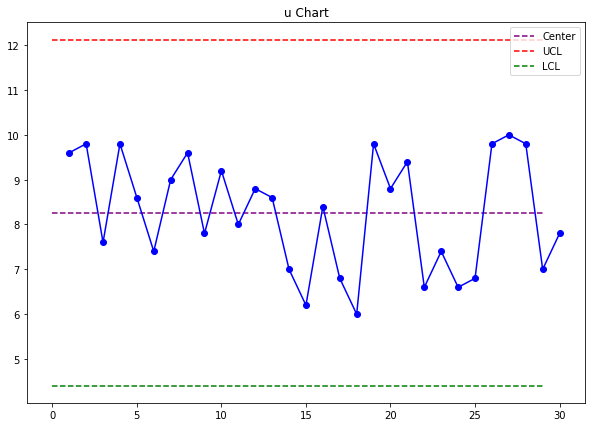

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(data['Number Non-conformities'], linestyle='-', marker='o', color='blue')
center = np.mean(data['Number Non-conformities'])
plt.hlines(y=center, xmin=0, xmax=29, color='purple', linestyles='dashed', label='Center')

UCL = center + 3 * np.sqrt(center / 5)
plt.hlines(y=UCL, xmin=0, xmax=29, color='red', linestyles='dashed', label="UCL")

LCL = center - 3 * np.sqrt(center / 5)
plt.hlines(y=LCL, xmin=0, xmax=29, color='green', linestyles='dashed', label="LCL")

print("Center:", center)
print("UCL:", UCL)
print("LCL:", LCL)

plt.legend()
plt.title("u Chart")
plt.show()

__Example 20.6.6__ (Example 20.6.5 continued) Suppose in Example 20.6.5 that for some administrative reason, it was not possible to examine five inspection units every day. In other words, the sample size varied and the data obtained are as shown in Table 20.5. Construct and interpret a u chart for the data in Table 20.5

In [23]:
data = pd.read_excel('table2066.xlsx')
data

,Day,Subgroup Size,Number Non-conformities
0,1,3,33
1,2,5,40
2,3,3,38
3,4,5,43
4,5,5,45
5,6,5,35
6,7,5,35
7,8,3,41
8,9,3,40
9,10,5,30


In [24]:
data['u'] = data['Number Non-conformities'] / data['Subgroup Size']
data.head()

,Day,Subgroup Size,Number Non-conformities,u
0,1,3,33,11.000000
1,2,5,40,8.000000
2,3,3,38,12.666667
3,4,5,43,8.600000
4,5,5,45,9.000000


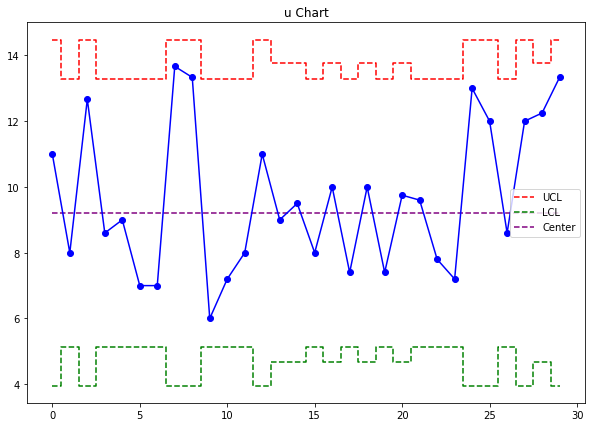

In [25]:
ubar = np.sum(data['Number Non-conformities']) / np.sum(data['Subgroup Size'])

UCL, LCL = [], []
for n in data['Subgroup Size']:
    LCL.append(ubar - 3 * np.sqrt(ubar / n))
    UCL.append(ubar + 3 * np.sqrt(ubar / n))

plt.figure(figsize=(10, 7))
plt.plot(data['u'], linestyle='-', marker='o', color='blue')

plt.hlines(y=ubar, xmin=0, xmax=29, color='purple', linestyles='dashed', label='Center')

plt.plot(UCL, color='red', linestyle='--', label="UCL", drawstyle='steps-mid')

plt.plot(LCL, color='green', linestyle='--', label="LCL", drawstyle='steps-mid')

plt.legend()
plt.title("u Chart")
plt.show()